# 8 - Decision Trees

## Aufgabe 8.1

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('data/mtcars.csv')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot:xlabel='mpg', ylabel='hp'>

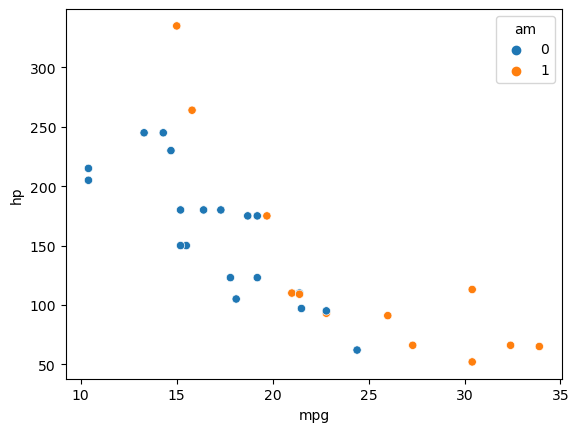

In [34]:
sns.scatterplot(data=df, x='mpg', y='hp', hue='am')

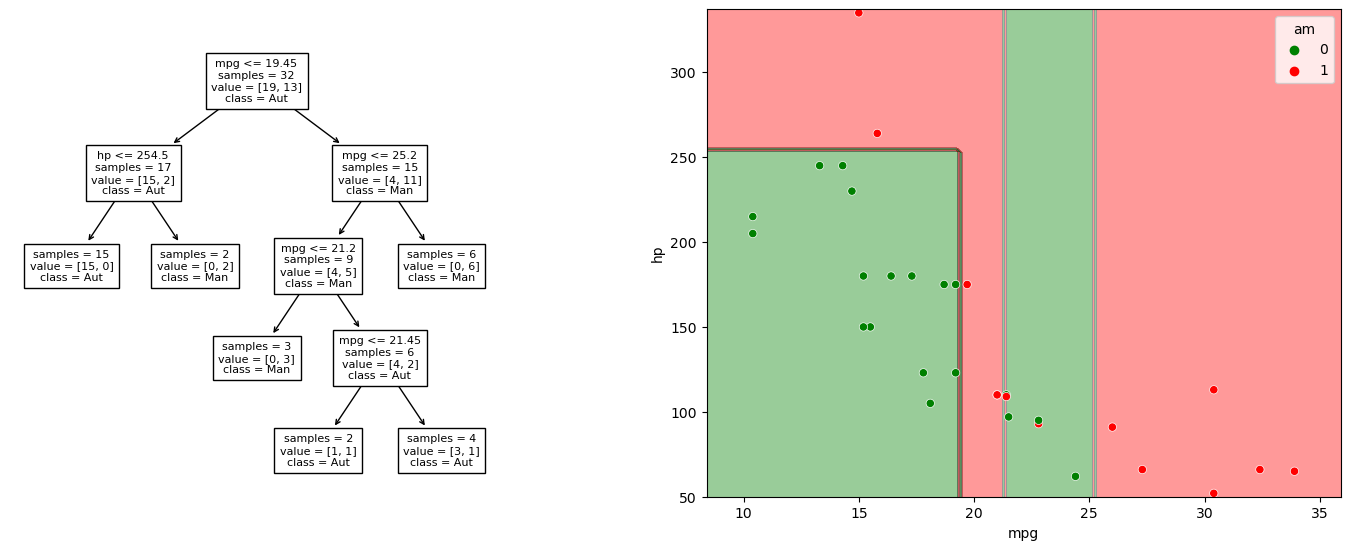

In [35]:
# 8.1) Tree 
from sklearn import tree

y = df[['am']]
x = df[['mpg', 'hp']]

# Create and fit Decision tree classifier
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  min_samples_split=6,          # minimum number of data samples required to split 
                                  min_samples_leaf=2,           # minimum number of data samples required to be in a leaf after a split
                                  min_impurity_decrease=0.001)

clf = clf.fit(x, y)

# Create grid
margin, n = 2, 100
xx = np.linspace(min(x['mpg']) - margin, max(x['mpg']) + margin, n)
yy = np.linspace(min(x['hp']) - margin, max(x['hp']) + margin, n)
yy, xx = np.meshgrid(yy, xx)
# Predict
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# Plot Decision Tree
tree.plot_tree(clf, ax=ax[0], impurity=False, fontsize=8,
               feature_names=x.columns.values, class_names=['Aut', 'Man'])
# Plot surface
ax[1].contourf(xx, yy, Z,
               colors=['green', 'black', 'red', 'black'], alpha=0.4)
# Plot datapoints
sns.scatterplot(x=df['mpg'], y=df['hp'], ax=ax[1],
                hue=df['am'], palette=['green', 'red'])
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
plt.show()


## Aufgabe 8.2

In [36]:
import pandas as pd
import numpy as np  
from sklearn import tree

df = pd.read_csv('data/OJ.csv')
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [37]:
df = pd.get_dummies(df, columns=['Store7'], drop_first=True)
df.rename(columns={'Store7_Yes': 'Store7'}, inplace=True)
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Store7
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,0
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,0
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,0
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,0
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,1


In [38]:
# 8.4 a) Train / Test Samples
np.random.seed(1)

i = df.index
# Index of train
i_train = np.random.choice(i, replace=False,
                           size=800)

# Save DataFrames
df_train = df.iloc[i_train]
df_test = df.drop(i_train)

In [39]:
df_train.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Store7
120,CH,260,2,1.86,2.18,0.0,0.7,0,0,0.959305,1.48,1.86,-0.38,0.321101,0.0,0.32,2,0
374,MM,237,2,1.75,1.99,0.0,0.0,0,0,0.400000,1.99,1.75,0.24,0.000000,0.0,0.24,2,0
90,CH,237,4,1.79,2.09,0.0,0.0,0,0,0.500000,2.09,1.79,0.30,0.000000,0.0,0.30,4,0
844,MM,274,2,1.96,2.18,0.0,0.8,0,1,0.329509,1.38,1.96,-0.58,0.366972,0.0,0.22,2,0
649,CH,249,2,1.89,2.09,0.0,0.0,0,0,0.891914,2.09,1.89,0.20,0.000000,0.0,0.20,2,0


In [40]:
df_test.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Store7
10,CH,240,7,1.86,2.09,0.0,0.0,0,0,0.988606,2.09,1.86,0.23,0.0,0.0,0.23,0,1
15,CH,278,7,2.06,2.13,0.0,0.0,0,0,0.795200,2.13,2.06,0.07,0.0,0.0,0.07,0,1
20,CH,257,7,1.86,2.18,0.0,0.0,0,0,0.600000,2.18,1.86,0.32,0.0,0.0,0.32,0,1
21,CH,258,1,1.76,2.18,0.0,0.0,0,0,0.680000,2.18,1.76,0.42,0.0,0.0,0.42,1,0
24,CH,268,7,1.86,2.13,0.0,0.0,0,0,0.836160,2.13,1.86,0.27,0.0,0.0,0.27,0,1


In [41]:
# 8.4 b) Fit tree

y_train = df_train['Purchase']
x_train = df_train.drop(['Purchase'], axis=1)
y_test = df_test['Purchase']
x_test = df_test.drop(['Purchase'], axis=1)


np.random.seed(1)

# tree settings:
tree_settings = {'criterion': 'entropy',
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'min_impurity_decrease': 0.005 ,
    'random_state': 1}

# Create and fit Decision tree classifier
clf = tree.DecisionTreeClassifier().set_params(**tree_settings)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.005,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=1)

In [42]:
FI = pd.DataFrame(data={'Feature': x_train.columns.values,
                        'Importance': clf.feature_importances_})

print('Feature importances:\n', FI,
'\n\nTree depth:\n', clf.get_depth(),
'\nNumber of leaves (Terminal Nodes):\n', clf.get_n_leaves(),
'\nTraining error:\n',
np.round(1 - clf.score(x_train, y_train), 3)
)


Feature importances:
            Feature  Importance
0   WeekofPurchase    0.011916
1          StoreID    0.000000
2          PriceCH    0.000000
3          PriceMM    0.000000
4           DiscCH    0.000000
5           DiscMM    0.000000
6        SpecialCH    0.023903
7        SpecialMM    0.000000
8          LoyalCH    0.697633
9      SalePriceMM    0.036939
10     SalePriceCH    0.009806
11       PriceDiff    0.046748
12       PctDiscMM    0.023374
13       PctDiscCH    0.000000
14   ListPriceDiff    0.110315
15           STORE    0.039366
16          Store7    0.000000 

Tree depth:
 7 
Number of leaves (Terminal Nodes):
 23 
Training error:
 0.125


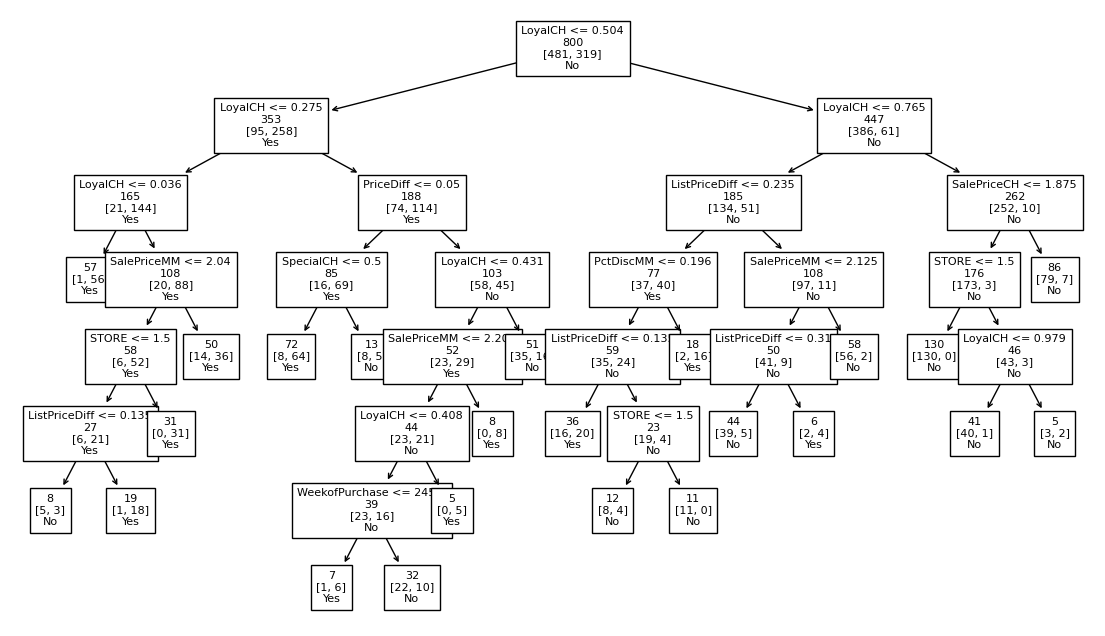

In [43]:
# 8.4 c) Plot Tree
import matplotlib.pyplot as plt

# Plots
fig, ax = plt.subplots(figsize=(14, 8))
# Plot Decision Tree
tree.plot_tree(clf, ax=ax, fontsize=8, impurity=False, label='Root',
feature_names=x_train.columns.values,
class_names=['No', 'Yes'])
plt.show()


In [44]:
# 8.4 d) Predict 

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
# Create confusion matrix
def confusion(y_true, y_pred):
    conf = pd.DataFrame({'predicted': y_pred, 'true': y_true})
    conf = pd.crosstab(conf.predicted, conf.true,
    margins=True, margins_name="Sum")
    return conf

print('Test data:\n',
      confusion(y_test.T.to_numpy(), y_test_pred))
print('\n\nTrain data:\n',
      confusion(y_train.T.to_numpy(), y_train_pred))

# class error: 
def class_err(x, y, model):
    """ Find classification error for given
    x, y and fitted model """
    y_pred = model.predict(x)
    # Classification error
    e = abs(y - y_pred).mean()
    return e

err_test = 1 - (y_test == y_test_pred).mean()
err_train = 1 - (y_train == y_train_pred).mean()

print('Test error:', np.round(err_test, 3))
print('Train error:', np.round(err_train, 3))

Test data:
 true        CH  MM  Sum
predicted              
CH         140  26  166
MM          32  72  104
Sum        172  98  270


Train data:
 true        CH   MM  Sum
predicted               
CH         436   55  491
MM          45  264  309
Sum        481  319  800
Test error: 0.215
Train error: 0.125


In [45]:
# 8.4 e) 5-fold Cross Validation

n_f = 5 # number of folds
# Train:
node = []
score_train, score_test = [], []
i = x_train.index
# Crossval size:
cv_size = int(len(i) / n_f)

for fold in range(n_f):
    """ 1. Split train data in train/crossval fold """
    # Index of cross-valdation fold
    i_cv_fold = i[np.arange(fold*cv_size, 
                            (fold + 1)*cv_size,1)]
    # Save DataFrames
    X_train_fold = x_train.drop(i_cv_fold)
    X_cv_fold = x_train.loc[i_cv_fold]
    y_train_fold = y_train.drop(i_cv_fold)
    y_cv_fold = y_train.loc[i_cv_fold]
    
    """ 2. Find score and size of respective Trees T(alpha) """
    path = clf.cost_complexity_pruning_path(X_train_fold,
    y_train_fold)
    for alpha in path.ccp_alphas:
        # Create and fit Decision tree classifier
        clf_cv = tree.DecisionTreeClassifier(ccp_alpha=alpha)
        clf_cv.set_params(**tree_settings)
        clf_cv = clf_cv.fit(X_train_fold, y_train_fold)
        # Save node count:
        node.append(clf_cv.get_n_leaves())
        # Save Scores
        score_train.append(clf_cv.score(X_train_fold, y_train_fold))
        score_test.append(clf_cv.score(X_cv_fold, y_cv_fold))
        
""" 3. Average found scores per node """
node = pd.Series(node)
node_sort = np.sort(node.unique())
score_train = pd.Series(score_train)
score_test = pd.Series(score_test)
score_train_avg, score_test_avg, node_avg = [], [], []

# Average per node
for i in node_sort:
    score_train_avg.append(score_train[node == i].mean())
    score_test_avg.append(score_test[node == i].mean())

# Optimal Treesize:
opt_size = node_sort[np.argmax(score_test_avg)]
print(opt_size)

10


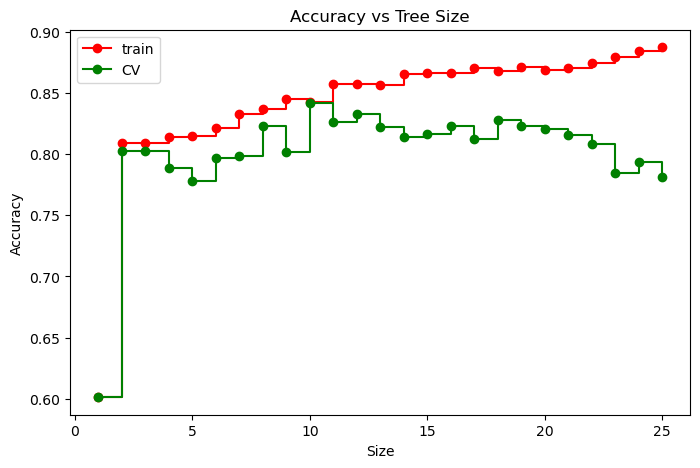

In [46]:
# 8.4f) Plot Score vs Size
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(node_sort, score_train_avg,
'r-o', drawstyle="steps-post", label='train')
ax.plot(node_sort, score_test_avg,
'g-o', drawstyle="steps-post", label='CV')
ax.set_xlabel("Size")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Tree Size")
plt.legend()
plt.show()


In [47]:
# 8.4g) 
print('Which tree size corresponds to the lowest cross-validated classiﬁcation error rate?: 10')


Which tree size corresponds to the lowest cross-validated classiﬁcation error rate?: 10


In [48]:
# 8.4 h) Pruned tree
np.random.seed(1)

# tree settings:
tree_settings = {'max_leaf_nodes': 10}

# Create and fit Decision tree classifier
clf_pruned = tree.DecisionTreeClassifier().set_params(**tree_settings)
clf_pruned.fit(x_train, y_train)

print('Tree depth:\n', clf_pruned.get_depth(),
      '\nNumber of leaves:\n', clf_pruned.get_n_leaves(),
      '\nTraining error:\n',
      np.round(1 - clf_pruned.score(x_train, y_train), 3)
)

Tree depth:
 5 
Number of leaves:
 10 
Training error:
 0.136


In [50]:
# 8.4 i / j) Compare to first model 

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

y_train_pred_pruned = clf_pruned.predict(x_train)
y_test_pred_pruned = clf_pruned.predict(x_test)


# class error: 
def class_err(x, y, model):
    """ Find classification error for given
    x, y and fitted model """
    y_pred = model.predict(x)
    # Classification error
    e = abs(y - y_pred).mean()
    return e

err_test = 1 - (y_test == y_test_pred).mean()
err_train = 1 - (y_train == y_train_pred).mean()
err_test_pruned = 1 - (y_test == y_test_pred_pruned).mean()
err_train_pruned = 1 - (y_train == y_train_pred_pruned).mean()

print('Test error:', np.round(err_test, 3))
print('Train error:', np.round(err_train, 3))
print('Test error pruned:', np.round(err_test_pruned, 3))
print('Train error pruned:', np.round(err_train_pruned, 3))


Test error: 0.215
Train error: 0.125
Test error pruned: 0.219
Train error pruned: 0.136
